<a href="https://colab.research.google.com/github/KhareShruti/SevenCode-Titanic-Survival-Prediction/blob/main/Titanic_Survival_Predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Survival Prediction**


**These major steps are performed to analyse the dataset :-**

**1. Importing Libraries**

**2. Exploratory Data Analysis**

**3. Model Training**

**4. Predictions**

**5. Analysis Conclusion**

## ***IMPORTING LIBRARIES***

In [ ]:
# Connecting Google Drive with Google Colab

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

 **Importing Data**

In [ ]:
# Loading dataset

data=pd.read_csv("/content/drive/MyDrive/Python Projects/Titanic Survival Predication/Titanic-Dataset.csv")

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **Descriptive Data Analysis**

In [ ]:
# Will give tuple of array dimension = (row,column)

data.shape

(891, 12)

In [ ]:
# Gives the information about standard mean, median, mode,

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Return label of each column in the DataFrame

data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Return the datatypes

data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## **Cleaning Dataset**

In [ ]:
# Finding if there is any null value

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Since "Cabin" Column has more than 75 % null values. So, we will drop this column.

data.drop(columns='Cabin', inplace=True, axis=1)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
# Filling Null Values in Age column and Embarked column with the mean values of age and mode values of embarked values, respectively.

data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [ ]:
# Checking for null values once again

data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Checking for duplicate values

data.duplicated().sum()

0

In [ ]:
# Hence, no duplicate values are present.

In [ ]:
# View the data

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Removing the uneccesary features of the dataset

data=data.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

In [ ]:
# Give information about DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## ***Exploratory Data Analysis***

In [ ]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

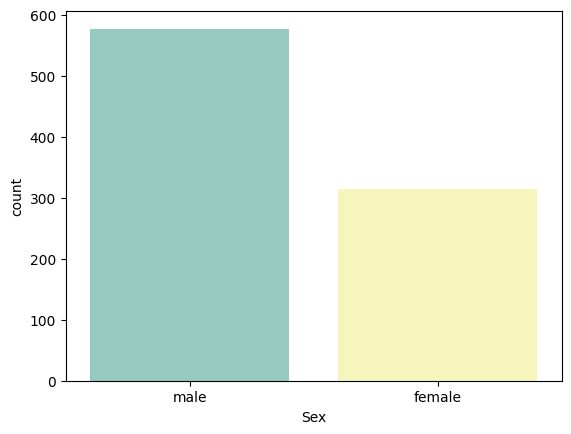

In [ ]:
# Plotting Count plot for sex column

sns.countplot(x=data['Sex'], palette="Set3")
plt.figsize=(2,2)
plt.show()

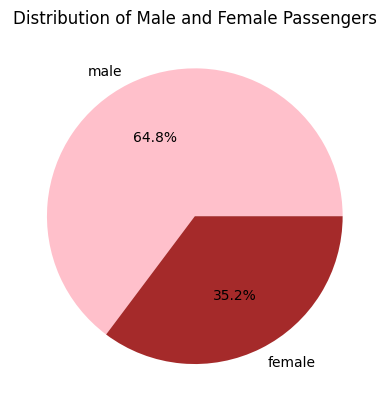

In [ ]:
# Plotting a pie chart for gender counts

gender_counts = data['Sex'].value_counts()
plt.figsize=(3, 3)
colors=['pink', 'brown']
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Male and Female Passengers')
plt.show()

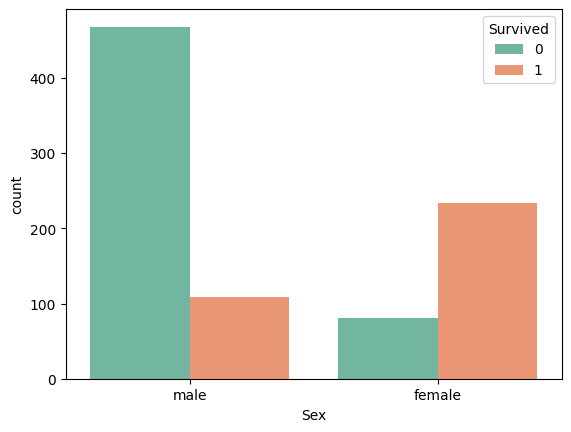

In [ ]:
#Showing Distribution of Sex Column Survived Wise
# In Sex (0 represents female and 1 represents male)

sns.countplot(x=data['Sex'],hue=data['Survived'], palette="Set2")
plt.figsize=(3, 3)
plt.show()

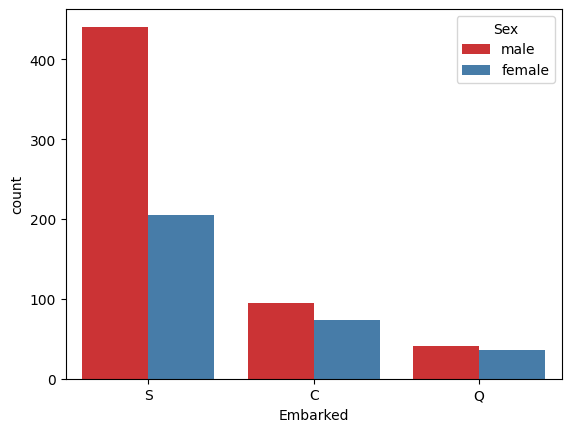

In [ ]:
# Showing Distribution of Embarked Sex wise

sns.countplot(x=data['Embarked'],hue=data['Sex'], palette="Set1")
plt.show()

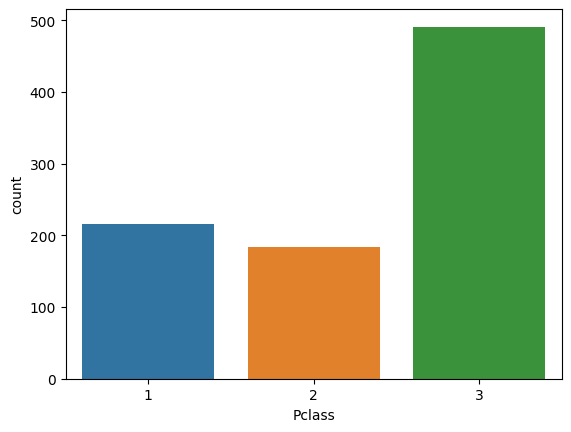

In [ ]:
# Plotting CountPlot for Pclass Column

sns.countplot(x=data['Pclass'])
plt.show()

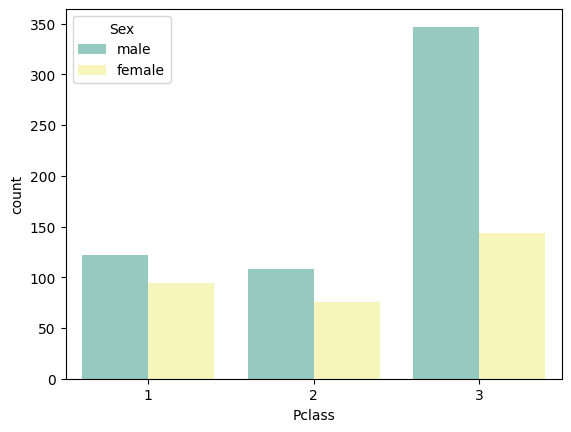

In [ ]:
#Showing Distribution of Pclass Sex wise

sns.countplot(x=data['Pclass'],hue=data['Sex'], palette="Set3")
plt.show()

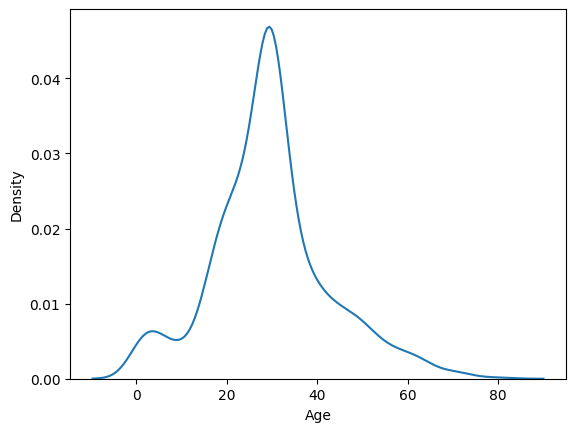

In [ ]:
# Kde Plot for Age Distribution

sns.kdeplot(x=data['Age'])
plt.figsize=(3,3)
plt.show()

In [ ]:
print(data['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


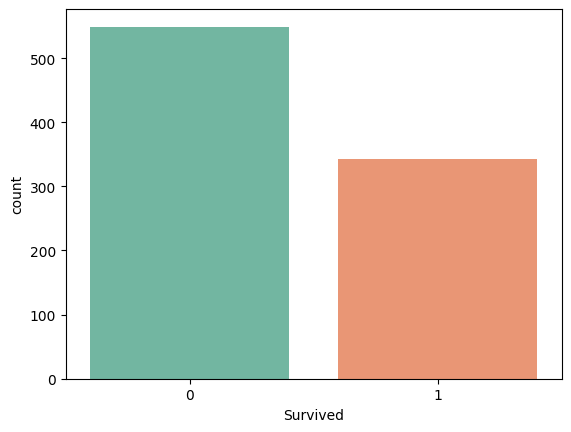

In [ ]:
# Plotting CountPlot for Survived Column

sns.countplot(x=data['Survived'], palette="Set2")
plt.figsize=(2,2)
plt.show()

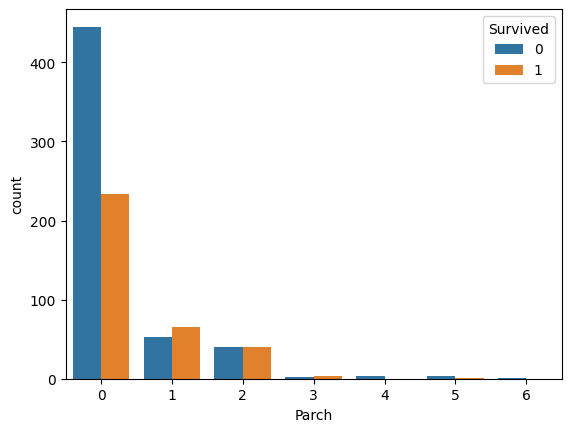

In [ ]:
# Showing Distribution of Parch Survived Wise

sns.countplot(x=data['Parch'],hue=data['Survived'])
plt.figsize=(2,2)
plt.show()

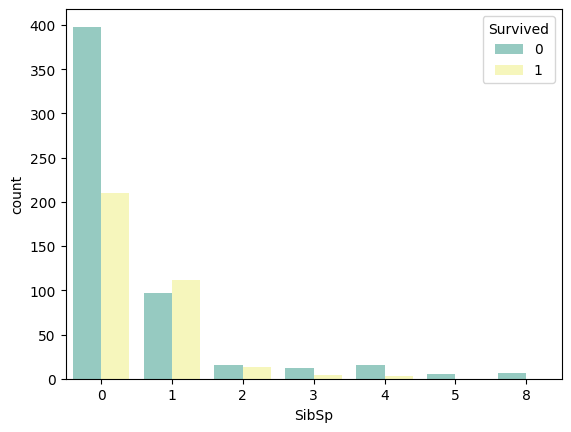

In [ ]:
# Showing Distribution of SibSp Survived Wise

sns.countplot(x=data['SibSp'],hue=data['Survived'], palette="Set3")
plt.figsize=(2,2)
plt.show()

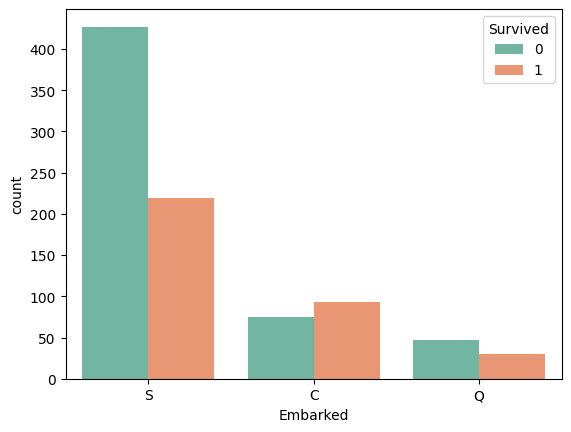

In [ ]:
# Showing Distribution of Embarked Survived wise
sns.countplot(x=data['Embarked'],hue=data['Survived'], palette='Set2')
plt.figsize=(2,2)
plt.show()

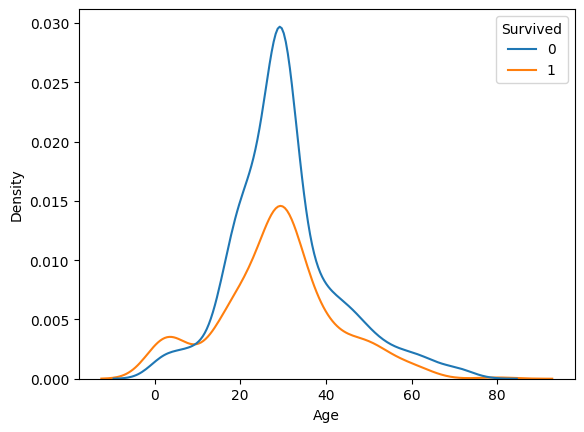

In [ ]:
# Showing Distribution of Age Survived Wise

sns.kdeplot(x=data['Age'],hue=data['Survived'])
plt.figsize=(2,2)
plt.show()

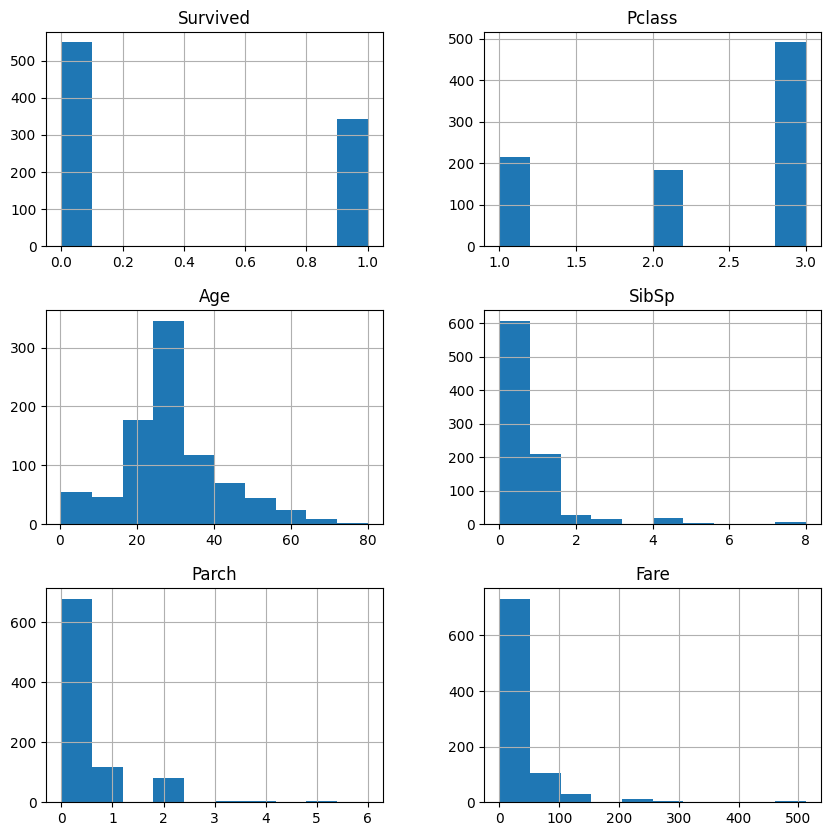

In [ ]:
# Plotting Histplot for Dataset

data.hist(figsize=(10,10))
plt.show()

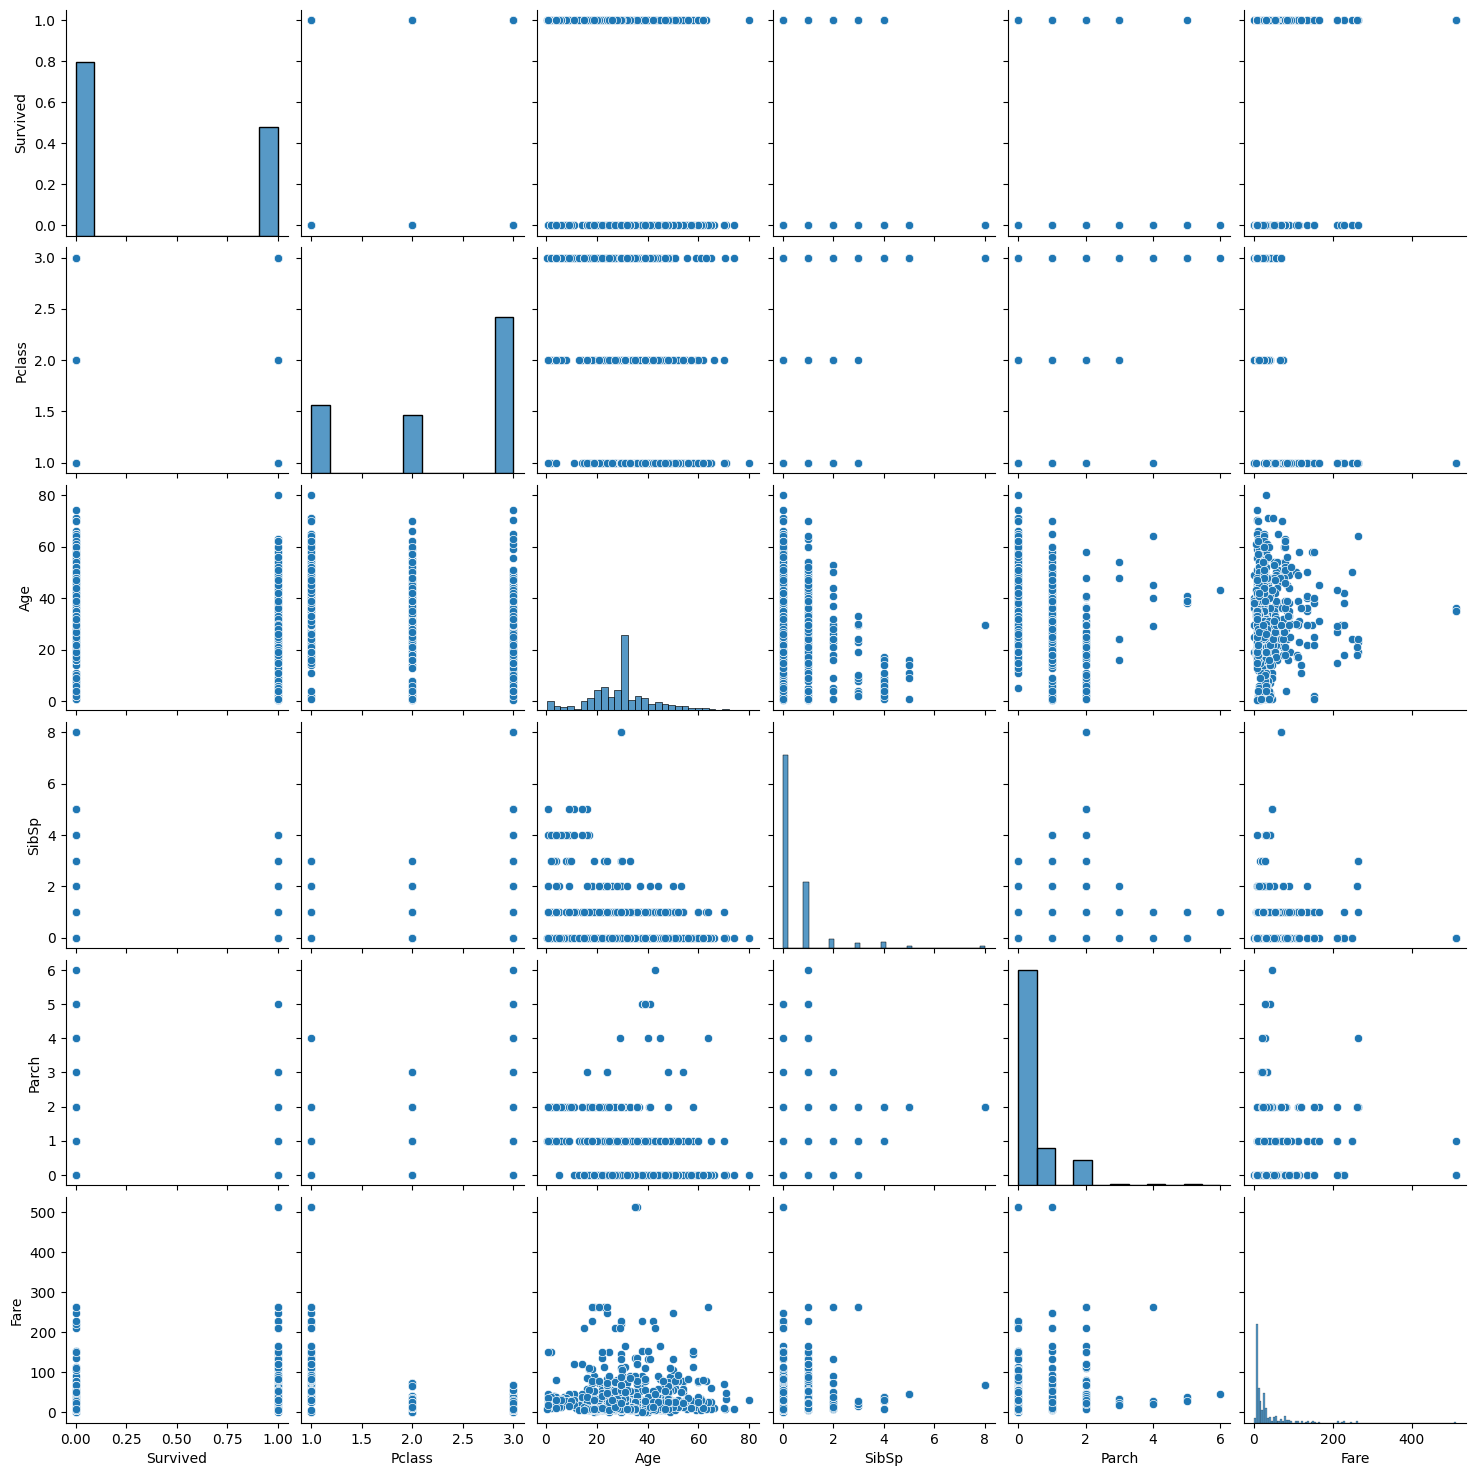

In [ ]:
# Plotting pairplot

sns.pairplot(data)
plt.show()

### **Label Encoding**

In [ ]:
# Creating an instance of LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Applying label encoding to each categorical column
for column in ['Sex','Embarked']:
 data[column] = le.fit_transform(data[column])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# ***Model Training***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
cols= ['Pclass',	'Sex',	'Age',	'SibSp',	'Parch',	'Fare',	'Embarked']
x = data[cols]
y = data['Survived']

In [ ]:
print(x.shape)
print(y.shape)

(891, 7)
(891,)


### **Train, Test, Split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.10, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


### **Creating Functions for computation of Confusion Matrix, Classification Report, Training and Testing Score**

In [ ]:
def cls_eval(ytest, ypred):
  cm=confusion_matrix(ytest,ypred)
  print('Confusion Matrix:',"\n", cm ,"\n")
  print('Classification Report:' "\n", classification_report(ytest,ypred))

def mscore(model):
  print('Training Score:', model.score(x_train,y_train))        #Training Accuracy
  print('Testing Score:', model.score(x_test,y_test))           #Testing Accuracy
  print("\n")

**1. LOGISTIC REGRESSION**

In [ ]:
# Building the logistic Regression Model
lr = LogisticRegression(max_iter=1000,solver='liblinear')

# Fitting x and y training data
lr.fit(x_train,y_train)

# Computing Trainig and Testing Score
mscore(lr)

# Assuming predictions
ypred_lr=lr.predict(x_test)
print('Predictions:' "\n", ypred_lr)
print("\n")

# Evaluating Classification report
cls_eval(y_test, ypred_lr)
acc_lr=accuracy_score(y_test,ypred_lr)
print("\n")
print('Accuracy Score', "{:.2f} %".format(acc_lr*100))

Training Score: 0.8052434456928839
Testing Score: 0.7666666666666667


Predictions:
 [1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


Confusion Matrix: 
 [[46  7]
 [14 23]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.81        53
           1       0.77      0.62      0.69        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90



Accuracy Score 76.67 %


**2. K-NEAREST NEIGHBOUR**

In [ ]:
# Building the KNN Model
knn=KNeighborsClassifier(n_neighbors=8)

# Fitting x and y training data
knn.fit(x_train,y_train)

# Computing Trainig and Testing Score
mscore(knn)

# Assuming predictions
ypred_knn=knn.predict(x_test)
print('Predictions:' "\n", ypred_knn)
print("\n")

# Evaluating Classification report
cls_eval(y_test, ypred_knn)
acc_knn=accuracy_score(y_test,ypred_knn)
print("\n")
print('Accuracy Score', "{:.2f} %".format(acc_knn*100))

Training Score: 0.7752808988764045
Testing Score: 0.6777777777777778


Predictions:
 [1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]


Confusion Matrix: 
 [[47  6]
 [23 14]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76        53
           1       0.70      0.38      0.49        37

    accuracy                           0.68        90
   macro avg       0.69      0.63      0.63        90
weighted avg       0.68      0.68      0.65        90



Accuracy Score 67.78 %


**3. SUPPORT VECTOR CLASSIFIER**

In [ ]:
# Building the SVC Model
svc = SVC(C=1.0)

# Fitting x and y training data
svc.fit(x_train,y_train)

# Computing Trainig and Testing Score
mscore(svc)

# Assuming predictions
ypred_svc=svc.predict(x_test)
print('Predictions:' "\n", ypred_svc)
print("\n")

# Evaluating Classification report
cls_eval(y_test, ypred_svc)
acc_svc=accuracy_score(y_test,ypred_svc)
print("\n")
print('Accuracy Score', "{:.2f} %".format(acc_svc*100))

Training Score: 0.6891385767790262
Testing Score: 0.6333333333333333


Predictions:
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


Confusion Matrix: 
 [[48  5]
 [28  9]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.91      0.74        53
           1       0.64      0.24      0.35        37

    accuracy                           0.63        90
   macro avg       0.64      0.57      0.55        90
weighted avg       0.64      0.63      0.58        90



Accuracy Score 63.33 %


**4. RANDOM FOREST CLASSIFIER**

In [ ]:
# Building the logistic Regression Model
rfc=RandomForestClassifier(n_estimators=80, criterion='entropy',min_samples_split=15, max_depth=10)

# Fitting x and y training data
rfc.fit(x_train,y_train)

# Computing Trainig and Testing Score
mscore(rfc)

# Assuming predictions
ypred_rfc=rfc.predict(x_test)
print('Predictions:' "\n", ypred_rfc)
print("\n")

# Evaluating Classification report
cls_eval(y_test, ypred_rfc)
acc_rfc=accuracy_score(y_test,ypred_rfc)
print("\n")
print('Accuracy Score', "{:.2f} %".format(acc_rfc*100))

Training Score: 0.8863920099875156
Testing Score: 0.7555555555555555


Predictions:
 [1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


Confusion Matrix: 
 [[47  6]
 [16 21]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.81        53
           1       0.78      0.57      0.66        37

    accuracy                           0.76        90
   macro avg       0.76      0.73      0.73        90
weighted avg       0.76      0.76      0.75        90



Accuracy Score 75.56 %


**5. DECISION TREE CLASSIFIER**

In [ ]:
# Building the Decision Tree Classifier Model
dt = DecisionTreeClassifier(criterion='entropy',min_samples_split=15, max_depth=10)


# Fitting x and y training data
dt.fit(x_train,y_train)

# Computing Trainig and Testing Score
mscore(dt)

# Assuming predictions
ypred_dt=dt.predict(x_test)
print('Predictions:' "\n", ypred_dt)
print("\n")

# Evaluating Classification report
cls_eval(y_test, ypred_dt)
acc_dt=accuracy_score(y_test,ypred_dt)
print("\n")
print('Accuracy Score', "{:.2f} %".format(acc_dt*100))

Training Score: 0.8801498127340824
Testing Score: 0.7888888888888889


Predictions:
 [1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


Confusion Matrix: 
 [[51  2]
 [17 20]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.96      0.84        53
           1       0.91      0.54      0.68        37

    accuracy                           0.79        90
   macro avg       0.83      0.75      0.76        90
weighted avg       0.82      0.79      0.78        90



Accuracy Score 78.89 %


## ***Evaluation***

In [ ]:
# Comparing all the five models together

models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'K-Nearest Neighbor', 'Support Vector Classifier', 'Random Forest Classifier', 'Decision Tree Classifier'],
    'Score' : [acc_lr,acc_knn,acc_svc,acc_rfc,acc_dt]})

models.sort_values(by='Score', ascending= False)

,Model,Score
4,Decision Tree Classifier,0.788889
0,Logistic Regression,0.766667
3,Random Forest Classifier,0.755556
1,K-Nearest Neighbor,0.677778
2,Support Vector Classifier,0.633333


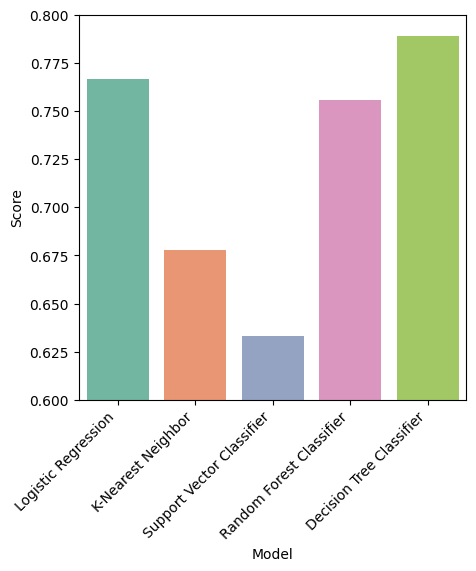

In [ ]:
plt.figure(figsize=(5,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation=45, ha='right')
plt.ylim(0.60,0.80)
sns.barplot(x=models['Model'],y=models['Score'], palette="Set2" )
plt.show()

Hence, Decision tree clasifier is the highest one